# 확률통계 프로그래밍

## 중간고사 대체 온라인 과제

> 17011675 이원준

<hr>

보고서의 가독성을 위해 Jupyter Notebook 에 R을 설치해 수행하였습니다.

## [문제1] (15점) diamonds는 패키지(package) “ggplot2”에 내장되어 있는 데이터이다.

### (1) 10개의 변수에서 ‘cut’에 대한 막대그래프(Bar Chart)를 예쁘게 R로 작성하여라.

그래프를 그리기 위해서 `ggplot2`를 사용하고, 

예쁜 색상을 이용하기 위해 `RColorBrewer`를 사용하였다.

In [1]:
library(ggplot2)
library(RColorBrewer)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"


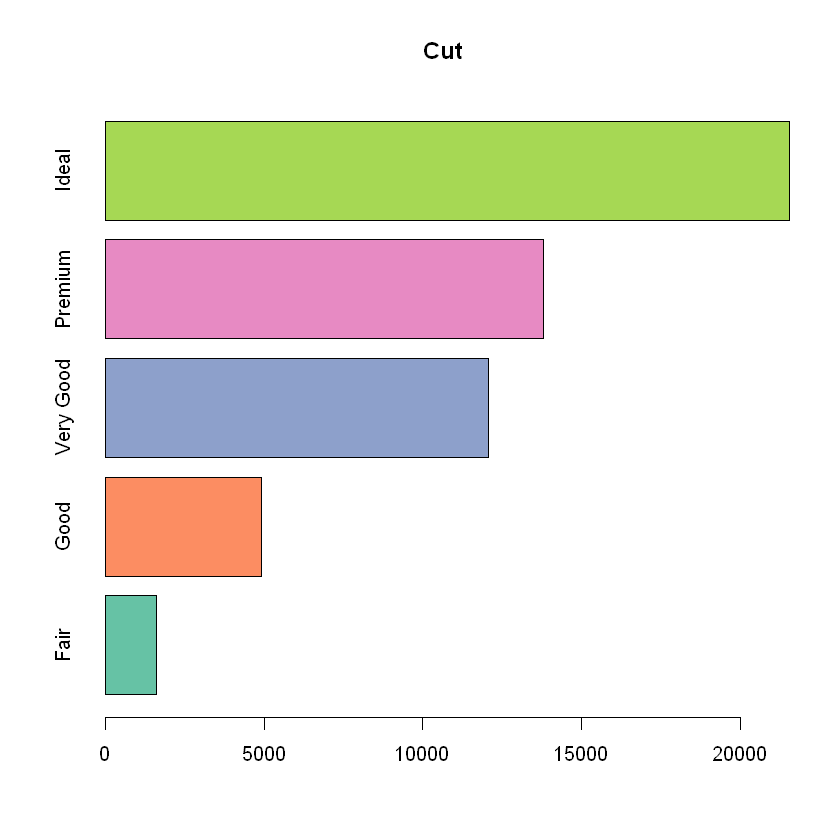

In [2]:
coul <- brewer.pal(length(levels(diamonds$cut)), "Set2") 
barplot(table(diamonds$cut),
        horiz=T,
        col=coul,
        main='Cut')

### (2) clarity에 대한 원형그래프(Pie Chart)를 예쁘게 꾸며 보세요.

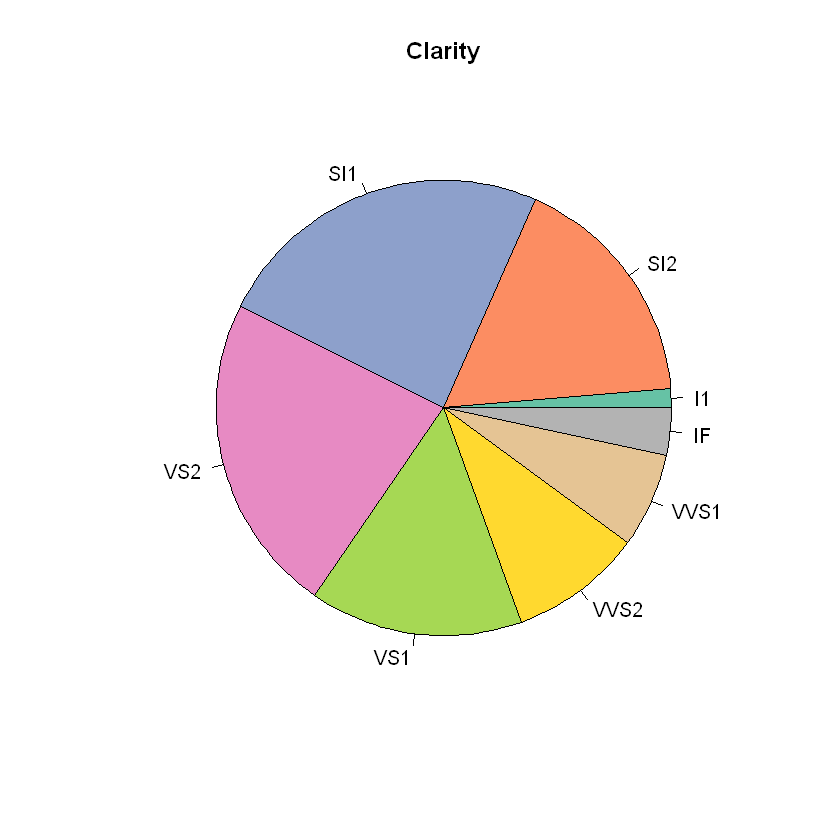

In [3]:
coul <- brewer.pal(length(levels(diamonds$clarity)), "Set2") 
pie(table(diamonds$clarity),
    col=coul,
    main='Clarity', # 그래프 제목설정
   )

## [문제2] (15점) MASS 패키지에 내장된 iris 데이터는 Sepal.Length(꽃받침의 길이), Sepal.Width(꽃받침의 폭), Petal.Length(꽃잎의 길이), Petal.Width(꽃잎의 폭)이라는 4개의 연속형 변수와 Species(품종)이라는 명목형(이산형) 변수가 있다.

### (1) iris 데이터에서 Sepal.Length의 줄기-잎 그림(Stem-and-Leaf plot)을 나타내어라.

In [4]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 3.6.2"


In [5]:
stem(iris$Sepal.Length)


  The decimal point is 1 digit(s) to the left of the |

  42 | 0
  44 | 0000
  46 | 000000
  48 | 00000000000
  50 | 0000000000000000000
  52 | 00000
  54 | 0000000000000
  56 | 00000000000000
  58 | 0000000000
  60 | 000000000000
  62 | 0000000000000
  64 | 000000000000
  66 | 0000000000
  68 | 0000000
  70 | 00
  72 | 0000
  74 | 0
  76 | 00000
  78 | 0



### (2) iris 데이터에서 Sepal.Width의 상자그림(Box Plot)을 나타내어라.

In [6]:
# 사분할수 확인해보기
quantile(iris$Sepal.Width)
IQR(iris$Sepal.Width)

0%  25%  50%  75% 100% 
 2.0  2.8  3.0  3.3  4.4

[1] 0.5

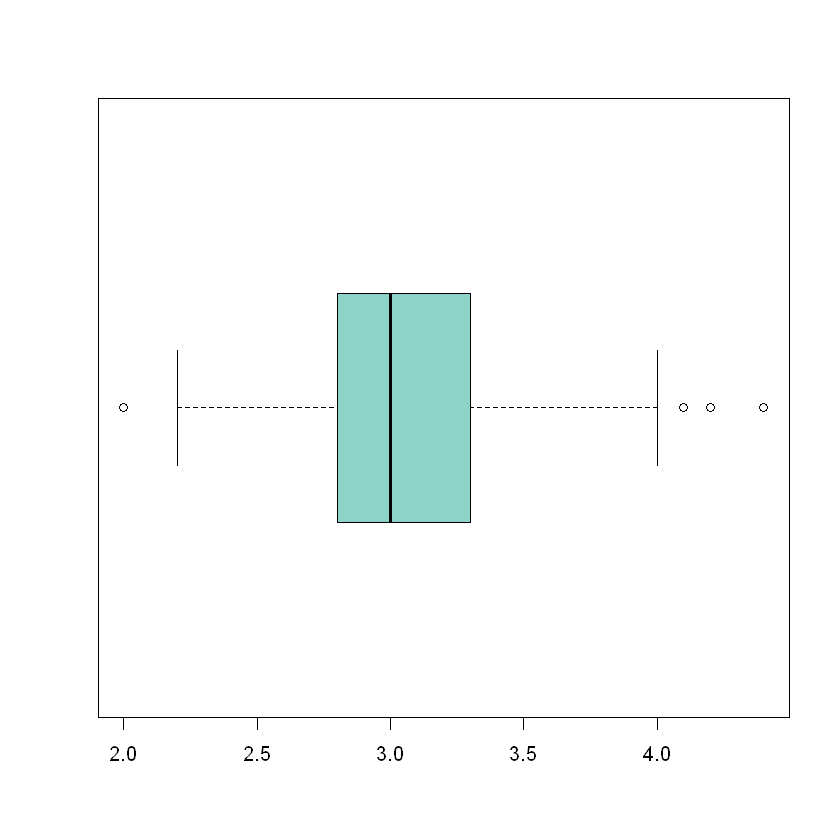

In [108]:
coul <- brewer.pal(3, "Set3")

boxplot(iris$Sepal.Width, 
        horizontal=T, 
        col=coul)

### (3) iris 데이터에서 Petal.Length의 히스토그램(histogram)을 나타내어라. 여기서 계급의 수는 Freedman-Diaconis' choice을 사용한다. 즉, 사분위수 범위(IQR, inter-quartile range)를 이용한 방법이다.

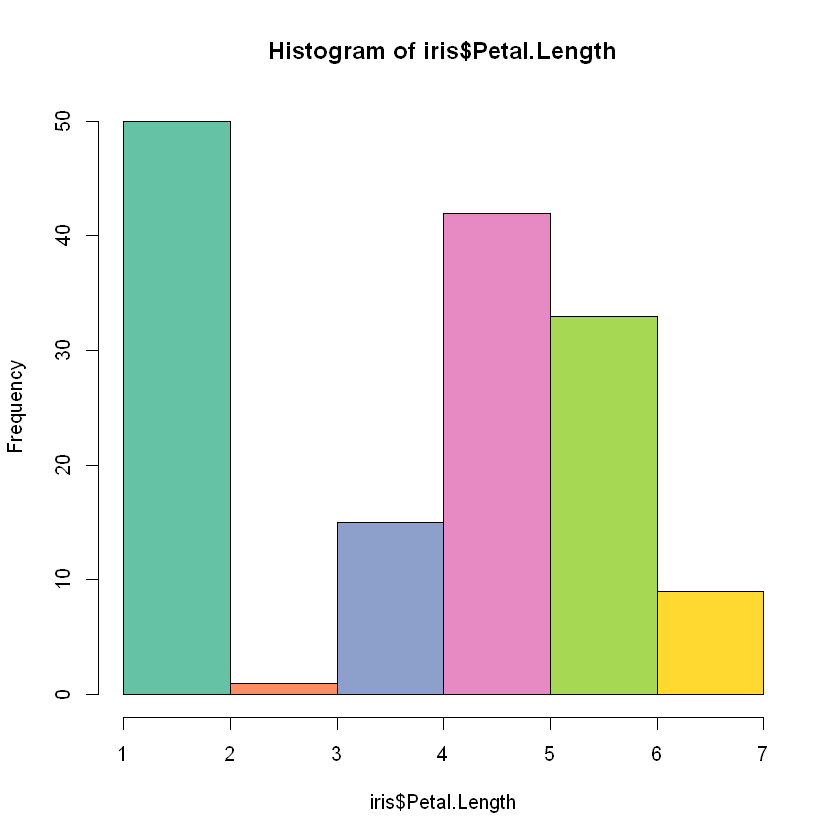

In [8]:
coul <- brewer.pal(nclass.FD(iris$Petal.Length) + 1, "Set2") 
hist(iris$Petal.Length,
     nclass=nclass.FD(iris$Petal.Length), # 히스토그램의 개수를 nclass.FD 로 결정
     col=coul)

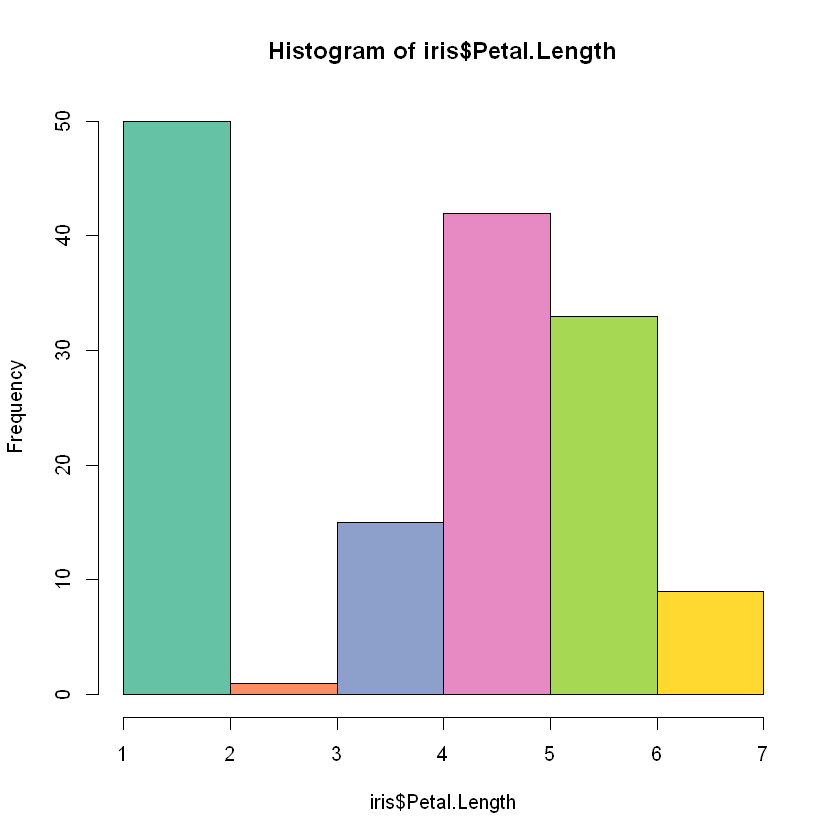

In [9]:
# 더 간단한 방법. (breaks="FD")
hist(iris$Petal.Length,
     breaks = "FD",
     col=coul)

## [문제3] (70점) (자유주제) 지금까지 학습한 내용 중에서 하나의 테마(주제)를 선정하여 심화 응용, 또는 확장된 내용을 작성하시오. 

<hr>

## 주제: 2012-2018 보행자 교통사고 정보를 R 패키지로 시각화 해보기

## 데이터

### 도로교통공단_교통사고 정보

교통사고정보를 위치데이터 기반 제공 교통사고 항목 별 정보제공

데이터 주소 : https://www.data.go.kr/data/15003493/fileData.do

In [10]:
# 사용할 데이터를 불러온다.
df <- read.csv("도로교통공단_교통사고다발지역_20191010.csv")

In [11]:
# 불러온 데이터프레임을 살펴보자.
str(df)

'data.frame':	10365 obs. of  16 variables:
 $ 사고지역관리번호      : int  2013060 2013060 2013060 2013060 2013060 2013060 2013060 2013060 2013060 2013060 ...
 $ 사고년도              : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ 사고유형구분          : Factor w/ 5 levels "무단횡단","보행노인",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ 위치코드              : int  11110001 11290001 11290002 11290003 11320001 11350001 11530001 11530002 11710001 26290001 ...
 $ 시도시군구명          : Factor w/ 2014 levels "강원 강릉1","강원 강릉2",..: 1534 1431 1440 1441 1363 1351 1333 1337 1448 1034 ...
 $ 사고지역위치명        : Factor w/ 8568 levels "강원도 강릉시 강동면(등명낙가사 부근)",..: 6685 6028 5974 5988 5412 5292 5128 5132 6113 4064 ...
 $ 발생건수              : int  2 2 2 3 2 2 2 2 2 2 ...
 $ 사상자수              : int  2 2 2 3 2 2 3 2 2 2 ...
 $ 사망자수              : int  0 0 0 0 0 1 0 0 0 0 ...
 $ 중상자수              : int  1 0 2 2 0 1 1 1 0 1 ...
 $ 경상자수              : int  1 1 0 1 2 0 0 1 2 1 ...
 $ 부상자수              : int  0 1 0 0 0 0 2 0 0 0 ...
 $ 위도   

위치 데이터는 사용하지 않을 것이므로 제거하기로 결정하였다.

## 전처리 과정

In [12]:
# 사용할 컬럼만 남기기
keep <- c("사고년도", "사고유형구분", "위치코드", "시도시군구명", "사고지역위치명", "발생건수", "사상자수", "사망자수", "중상자수", "경상자수", "부상자수")
df <- df[keep]

In [13]:
# 시도시군구명을 분리하여 행정구역을 얻어내자.
local <- data.frame(do.call('rbind', strsplit(as.character(df$"시도시군구명"), split=" ")))["X1"]
names(local) <- c("시도")

Warning message in rbind(c("서울특별시", "종로구1"), c("서울특별시", "성북구1"), :
"number of columns of result is not a multiple of vector length (arg 1)"


In [14]:
df <- cbind(df, local)

In [15]:
# 시도 (Factor)의 레벨을 확인해보자.
levels(df$"시도")

[1] "강원"           "강원도"         "경기"           "경기도"        
 [5] "경남"           "경북"           "경상남도"       "경상북도"      
 [9] "광주"           "광주광역시"     "대구"           "대구광역시"    
[13] "대전"           "대전광역시"     "부산"           "부산광역시"    
[17] "서울"           "서울특별시"     "세종특별자치시" "울산"          
[21] "울산광역시"     "인천"           "인천광역시"     "전남"          
[25] "전라남도"       "전라북도"       "전북"           "제주"          
[29] "제주특별자치도" "충남"           "충북"           "충청남도"      
[33] "충청북도"

단순히 `strsplit`으로 `시도명` 정보를 얻으려고 했으나, `강원도`, `강원` 같이 표기 차이를 확인했다. 

같은 지역을 동일한 시도명으로 묶어주기 위해서 아래와 같이 함수를 작성하고 `apply` 하였다.

In [16]:
replace_local_name <- function(x) {
    
    r <- switch(x, 
                "강원도" = "강원",
                "경상남도"= "경남",
                "경상북도"= "경북",
                "광주광역시"="광주",
                "대구광역시"="대구",
                "대전광역시"="대전",
                "부산광역시"="부산",
                "서울특별시"="서울", 
                "세종특별자치시"="세종",
                "울산광역시"="울산",
                "인천광역시"="인천",
                "전라남도"="전남",
                "전라북도"="전북",
                "제주특별자치도"="제주",
                "충청남도"="충남",
                "충청북도"="충북",
                "경기도"="경기",
                x # default
               )
    return (r)
}

In [17]:
# 함수를 적용한 `시도` 컬럼을 기존 데이터프레임이 결합
df <- data.frame(df[-12], apply(df["시도"], 1, replace_local_name))

In [18]:
# 변경된 컬럼의 이름을 다시 지정
colnames(df)[12] <- "시도"

In [19]:
str(df)

'data.frame':	10365 obs. of  12 variables:
 $ 사고년도      : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ 사고유형구분  : Factor w/ 5 levels "무단횡단","보행노인",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ 위치코드      : int  11110001 11290001 11290002 11290003 11320001 11350001 11530001 11530002 11710001 26290001 ...
 $ 시도시군구명  : Factor w/ 2014 levels "강원 강릉1","강원 강릉2",..: 1534 1431 1440 1441 1363 1351 1333 1337 1448 1034 ...
 $ 사고지역위치명: Factor w/ 8568 levels "강원도 강릉시 강동면(등명낙가사 부근)",..: 6685 6028 5974 5988 5412 5292 5128 5132 6113 4064 ...
 $ 발생건수      : int  2 2 2 3 2 2 2 2 2 2 ...
 $ 사상자수      : int  2 2 2 3 2 2 3 2 2 2 ...
 $ 사망자수      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ 중상자수      : int  1 0 2 2 0 1 1 1 0 1 ...
 $ 경상자수      : int  1 1 0 1 2 0 0 1 2 1 ...
 $ 부상자수      : int  0 1 0 0 0 0 2 0 0 0 ...
 $ 시도          : Factor w/ 17 levels "강원","경기",..: 9 9 9 9 9 9 9 9 9 8 ...


전처리를 통해 기존 2014 레벨을 가지는 Factor `시도시군구명`을 17 레벨의 `시도` Factor로 변환할 수 있었다.

## Barplot 으로 데이터 탐구하기

### 1. 시도별 교통사고 발생건수 알아보기

In [20]:
# 발생건수와 시도 정보를 하나의 데이터 프레임으로 나누었다.
freq = aggregate(df[c("발생건수", "시도")]$"발생건수", 
                 by=list(df[c("발생건수", "시도")]$"시도"), 
                 FUN=sum)

In [21]:
names(freq) <- c("시도", "발생건수")

In [22]:
# Factor 인 시도 컬럼을 문자형으로 변경
freq["시도"] <- lapply(freq["시도"], as.character)

In [23]:
# 발생건수로 내림차순 정렬
freq <- freq[order(-freq$"발생건수"),]

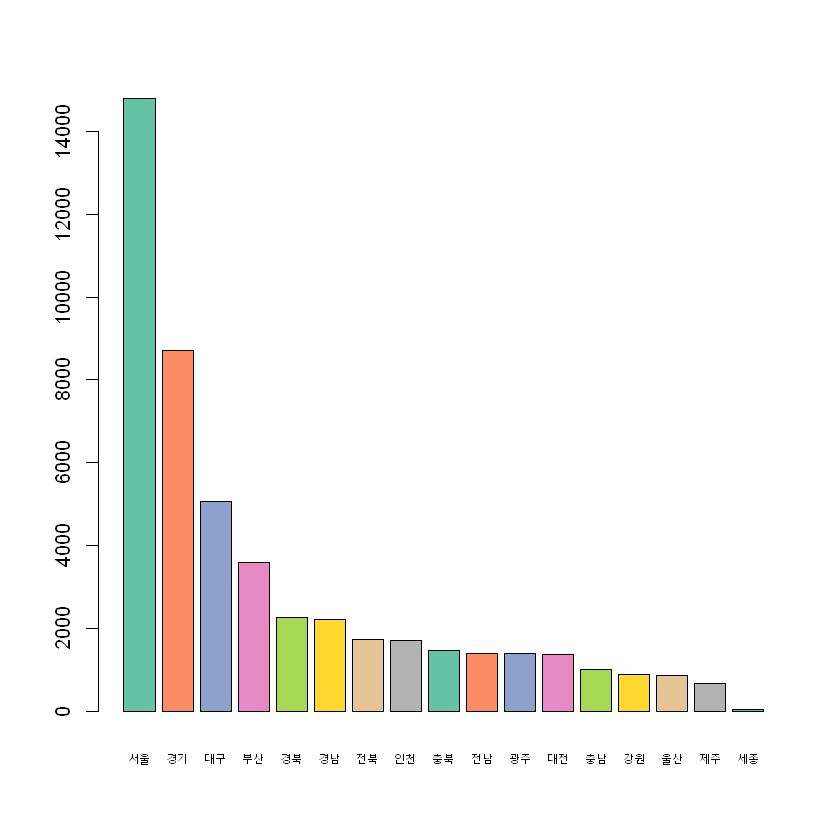

In [24]:
coul <- brewer.pal(8, "Set2")
barplot(unlist(freq["발생건수"], use.names=FALSE),
        names.arg=unlist(freq["시도"], use.names=FALSE), # 라벨은 시도 정보가 들어가도록 설정
        col=coul,
        cex.names=0.7 # 라벨의 폰트 크기를 줄였다.
       )

`서울` -> `경기` -> `대구` -> `부산` 순으로 사망자가 발생한 교통사고가 많이 발생한것을 확인 할 수 있었다.

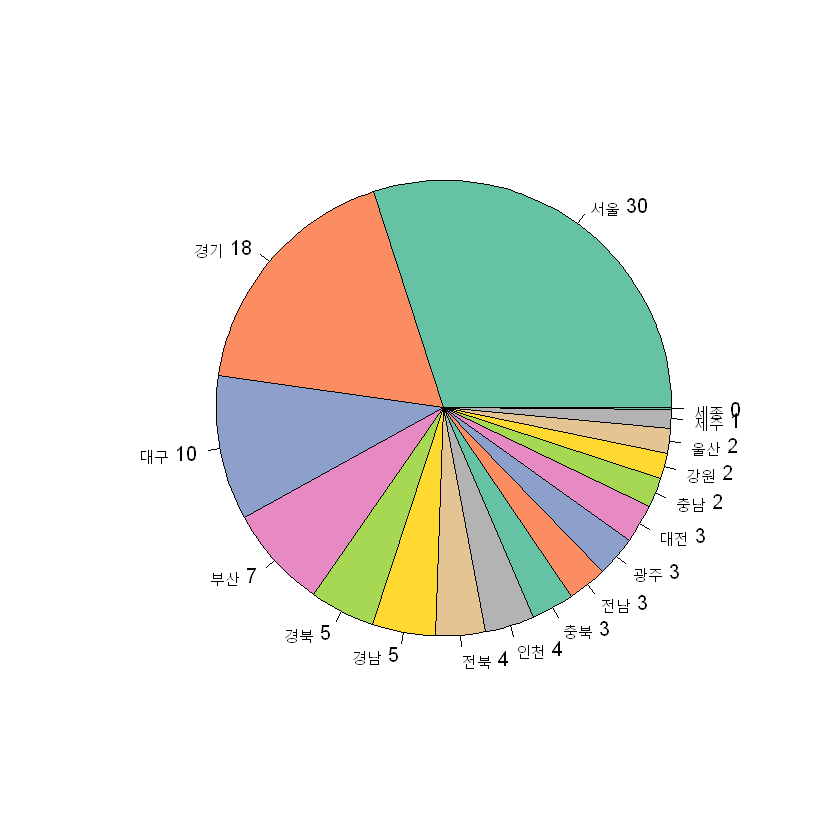

In [50]:
coul <- brewer.pal(8, "Set2") # 동일한 컬러세트

slices <-unlist(freq["발생건수"], use.names=FALSE) # 발생건수 
pct <- round(slices/sum(slices)*100) # 발생건수로 퍼센티지 계산 (반올림)
lbls <- freq$"시도" # 라벨 추가
lbls <- paste(lbls, pct) # 퍼센티지 추가

pie(unlist(freq["발생건수"], use.names=FALSE),
        col=coul,
        labels=lbls,
    )

`시도`별 교통사고 비율을 `PieChart` 로 나타내어 보았다.

또한 위에서 나타낸 Barplot 과 동일한 색상을 사용해서 매칭하기 쉽도록 하였고,

`Percentage` 를 나타나었다. 

### 2. 사고유형별 사상자 유형 알아보기

In [26]:
acc_type <- df[c("사고유형구분", "사망자수", "중상자수", "경상자수", "부상자수")]

In [27]:
t = aggregate(acc_type[c("사망자수", "중상자수", "경상자수", "부상자수")], 
                 by=list(acc_type$"사고유형구분"), 
                 FUN=sum)

In [28]:
t # 사고유형별 사상자 수

Group.1,사망자수,중상자수,경상자수,부상자수
<fct>,<int>,<int>,<int>,<int>
무단횡단,836,7047,4222,440
보행노인,1288,10044,5204,551
보행어린이,23,1036,1918,201
스쿨존어린이,34,219,329,22
자전거,247,6418,9542,2396


In [29]:
new_t = as.matrix(t(t))
new_t

Group.1,무단횡단,보행노인,보행어린이,스쿨존어린이,자전거
사망자수,836,1288,23,34,247
중상자수,7047,10044,1036,219,6418
경상자수,4222,5204,1918,329,9542
부상자수,440,551,201,22,2396


In [30]:
new_t[1, ] 

[1] "무단횡단"     "보행노인"     "보행어린이"   "스쿨존어린이" "자전거"

In [31]:
colnames(new_t) <- new_t[1, ] # 컬럼명을 부여하였다. 

In [32]:
new_t <- new_t[-1, ] # 첫번째 컬럼을 삭제

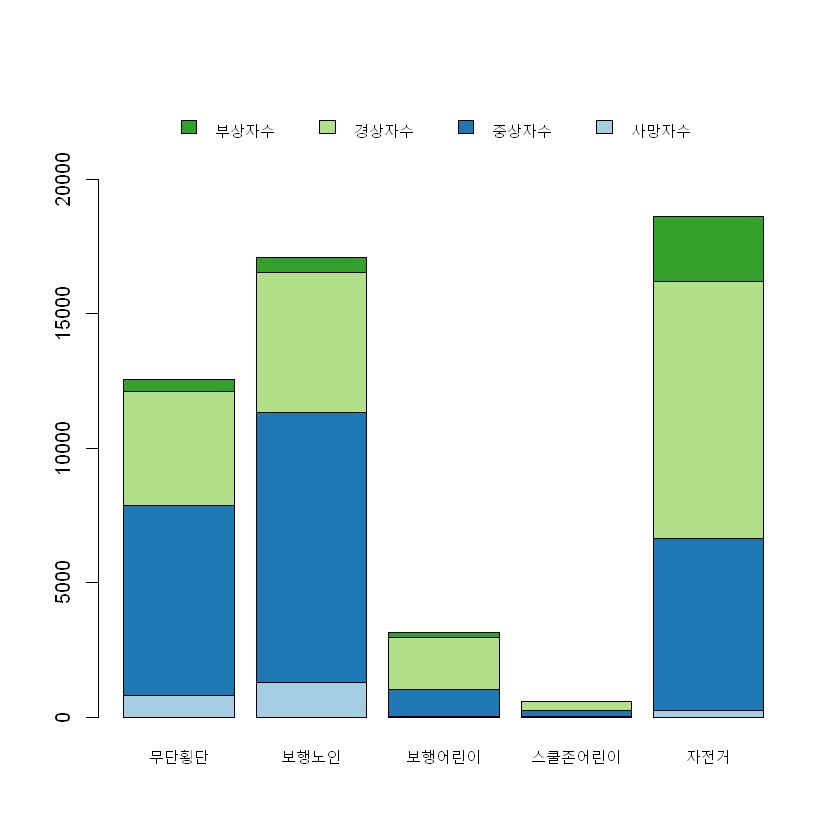

In [38]:
coul=brewer.pal(nrow(new_t), "Paired") # color brewer 에서 제공하는 Paired 세트를 사용
barplot(new_t,
        legend=TRUE,
        args.legend = list(bty = "n", x = "top", ncol = 4), # Legend가 표 위쪽에 위치하도록 변경
        ylim = c(0, 23000), # Y 축 범위를 늘려서 Legend 가 표를 가리지 않도록 조절하였다. 
        col=coul)

각 `사고유형구분` 마다 사상자 비율이 다름을 확인 할 수 있었다. 

`자전거` 사고의 경우 대부분이 `경상자` 이지만, 

`보행노인`, `무단횡단` 사고의 경우 대부분이 `중상자` 임을 확인 할 수 있다.  

### 3. 사고년도별 발생건수 살펴보기 

In [81]:
year_cnt <- df[c("사고년도", "발생건수")]

In [101]:
yc = aggregate(year_cnt["발생건수"], 
                 by=list(year_cnt$"사고년도"), 
                 FUN=sum)

In [102]:
yc

Group.1,발생건수
<int>,<int>
2012,8494
2013,7856
2014,8047
2015,7932
2016,6423
2017,5666
2018,4824


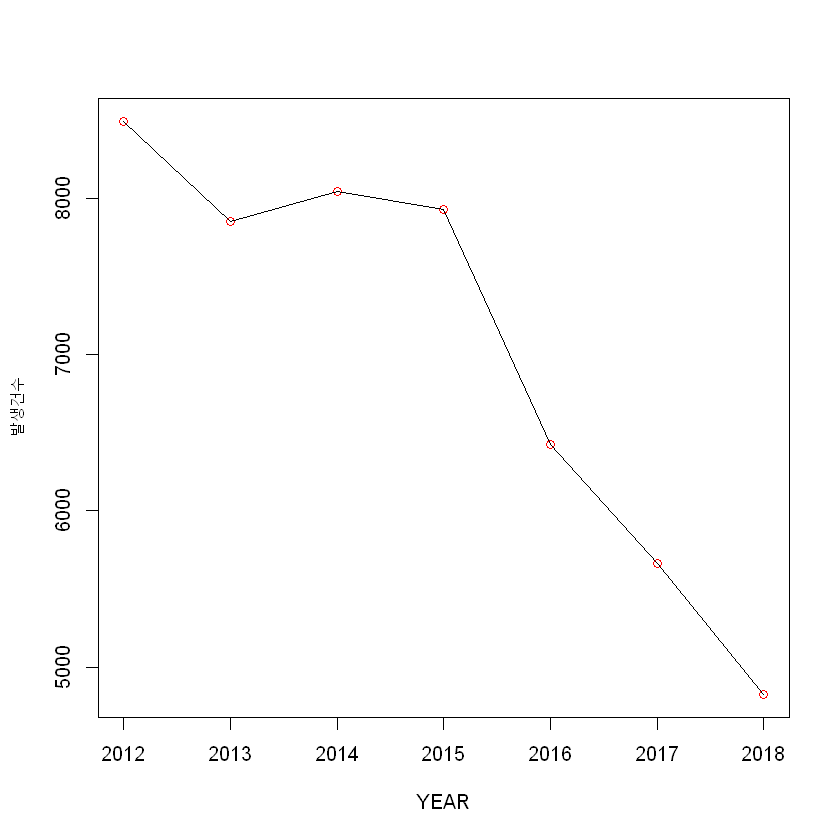

In [107]:
plot(yc,
     type = "o",
     col = "red",
     xlab = "YEAR",   # x 축은 사고년도, y 축은 발생건수 를 나타냄
     ylab = "발생건수",
    ) 
lines(yc) # 점을 연결함 

`2012년` 부터 `2018년` 까지 교통사고 발생건수는 `지속적으로 감소`하는 추세임을 확인할 수 있었다. 